<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/example_make_gaussian_quantiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import time
import os.path
import requests
from numpy import genfromtxt
from sklearn.datasets import make_moons, make_circles, make_classification, make_gaussian_quantiles
import pandas as pd
!mkdir data #let us create data folder to hold our data

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune import DenMune

In [59]:
X, y =make_gaussian_quantiles(n_samples=2000, n_features=2, n_classes=3)
pd.DataFrame(X).head()

,0,1
0,0.447079,2.547967
1,-1.125597,1.488687
2,-0.470447,1.740964
3,1.098492,2.004093
4,0.463150,0.056207


In [60]:
data = X
data_labels = y
#file_2d = 'data/classification-2d.txt'

classification dataset : Groundtruht


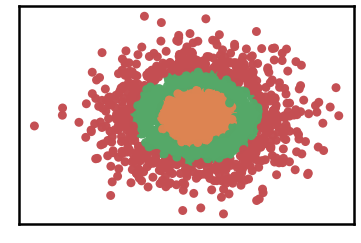



classification dataset : DenMune Clustering


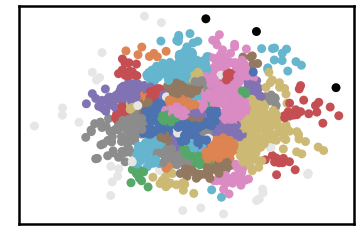

DenMune Analyzer
├── exec_time
│   ├── DenMune: 0.261
│   └── NGT: 0.027
├── n_clusters
│   ├── actual: 3
│   └── detected: 60
├── n_points
│   ├── dim: 2
│   ├── noise
│   │   ├── type-1: 3
│   │   └── type-2: 58
│   ├── size: 2000
│   ├── strong: 1194
│   └── weak
│       ├── all: 806
│       ├── failed to merge: 58
│       └── succeeded to merge: 748
└── validity
    ├── ACC: 1511
    ├── AMI: 0.475
    ├── ARI: 0.463
    ├── F1: 0.764
    ├── NMI: 0.477
    ├── completeness: 0.454
    └── homogeneity: 0.503

k= 6 F1 score is: 0.764


In [64]:
# Denmune's Paramaters
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
show_groundtrugh = True  # show plots on/off
show_noise = True # show noise and outlier on/off

knn = 6
dm = DenMune(data=data,  file_2d=file_2d, k_nearest=knn, verpose=verpose_mode, show_noise=show_noise, rgn_tsne=True )
labels_pred = dm.fit_predict()

if show_groundtrugh:
    # Let us plot the groundtruth of this dataset
    print ("classification dataset", ": Groundtruht")
    dm.plot_clusters(labels=data_labels, ground=True)
    print('\n', "=====" * 20 , '\n')       

# Let us plot the results produced using DenMune
print ("classification dataset", ": DenMune Clustering")
dm.plot_clusters(labels=labels_pred, show_noise=show_noise)

validity = dm.validate_Clusters(labels_true=data_labels, labels_pred=labels_pred)
validity_key = "F1" 
# Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7       
print ('k=' , knn, validity_key , 'score is:', round(validity[validity_key],3))